In [2]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd 

clean_df = pd.read_csv('/content/drive/MyDrive/Hackaton/clean-data/clean_tabla.csv', index_col=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = clean_df.copy()
df.head(5)

,escuela_id,sexo,indice_socioeconomico,nivel_desemp_matematica,nivel_desemp_lengua,nivel_desemp_ciencias_sociales,nivel_desemp_ciencias_naturales,tiene_notebook,tiene_pc,tiene_tablet,tiene_celular,tiene_smartphone,tiene_consola,tiene_smarttv,tiene_cable,repeticion_primaria,repeticion_secundaria,nivel_id,year_id,ambito,gestion,icse,icse_cat,indice_socioeconomico_medio,indice_socioeconomico_medio_cat,tecnica,tiene_internet,subvencion,dependencia,tasa_con_nbi,mate_nc_na,lengua_nc_na,sociales_nc_na,naturales_nc_na,Mate_avanzado,Mate_satisfactorio,Mate_Basico,Mate_Bajo_Basico,lengua_avanzado,lengua_satisfactorio,lengua_Basico,lengua_Bajo_Basico,sociales_avanzado,sociales_satisfactorio,sociales_Basico,sociales_Bajo_Basico,naturales_avanzado,naturales_satisfactorio,naturales_Basico,naturales_Bajo_Basico,departamento_id,provincia_id
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
608698.0,540901809,0.0,2.0,satisfactorio,satisfactorio,NaN,NaN,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,NaN,2,2016,0,1,-1.000,NaN,2.009901,2.0,0,1.0,1.0,0.0,0.10466,0,0,1,1,0.0,1.162457,0.0,0.000000,0.000000,1.166861,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
457489.0,1152730019,0.0,1.0,por_debajo_del_basico,basico,NaN,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,2,2016,0,1,-1.000,NaN,2.196429,2.0,0,1.0,1.0,0.0,0.10466,0,0,1,1,0.0,0.000000,0.0,1.100506,0.000000,0.000000,1.104708,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1563023.0,1145017919,0.0,2.0,NaN,NaN,NaN,satisfactorio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2,2017,0,0,0.267,0.0,1.816327,1.0,0,1.0,2.0,0.0,0.10466,1,1,1,0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.537383,0.0,0.000000,0.0,0.0
1795162.0,1022298417,0.0,1.0,NaN,NaN,basico,por_debajo_del_basico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2,2017,0,0,0.442,1.0,1.865169,1.0,0,0.0,2.0,0.0,0.10466,1,1,0,0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.169184,0.0,0.0,0.000000,0.0,1.166764,0.0,0.0
508042.0,1152730019,0.0,1.0,satisfactorio,avanzado,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,NaN,2,2016,0,1,-1.000,NaN,2.196429,2.0,0,1.0,1.0,0.0,0.10466,0,0,1,1,0.0,1.100506,0.0,0.000000,1.104708,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


In [5]:
#Keep only Secundaria
data = df[(df.nivel_id == 3)].copy()

In [6]:
to_keep = ['tiene_smartphone', 'indice_socioeconomico_medio_cat']
data = data[to_keep].dropna()
data

,tiene_smartphone,indice_socioeconomico_medio_cat
id,,
1037297.0,1.0,1.0
1014085.0,1.0,1.0
1130145.0,1.0,1.0
1047308.0,0.0,1.0
1206413.0,1.0,1.0
...,...,...
1000351.0,1.0,2.0
1122927.0,0.0,2.0
973858.0,1.0,2.0


In [7]:
replace = {
    'indice_socioeconomico_medio_cat':{
        0:'low', 1: 'mid', 2:'high'
    },
    
}
data.replace(to_replace=replace, value=None, inplace=True)

In [8]:
data = pd.merge(data, pd.get_dummies(data.indice_socioeconomico_medio_cat, 'ise_cat'), left_index=True, right_index=True)

In [9]:
data.drop(columns=['indice_socioeconomico_medio_cat'],axis=1,inplace=True)
data

,tiene_smartphone,ise_cat_high,ise_cat_low,ise_cat_mid
id,,,,
1037297.0,1.0,0,0,1
1014085.0,1.0,0,0,1
1130145.0,1.0,0,0,1
1047308.0,0.0,0,0,1
1206413.0,1.0,0,0,1
...,...,...,...,...
1000351.0,1.0,1,0,0
1122927.0,0.0,1,0,0
973858.0,1.0,1,0,0


In [10]:
targets = data.drop_duplicates().sort_values(by=['tiene_smartphone',"ise_cat_high",'ise_cat_mid','ise_cat_low'], ascending=False)
targets

,tiene_smartphone,ise_cat_high,ise_cat_low,ise_cat_mid
id,,,,
1024544.0,1.0,1,0,0
1037297.0,1.0,0,0,1
964912.0,1.0,0,1,0
1131018.0,0.0,1,0,0
1047308.0,0.0,0,0,1
958641.0,0.0,0,1,0


In [11]:
probs = []
for i in range(0, len(targets)):
    probs.append((data == targets.iloc[i,]).all(axis=1).mean())
probs

[0.27832689573171365,
 0.09128298908678768,
 0.01655234274231399,
 0.20477135794571555,
 0.26903380349264516,
 0.14003261100082395]

In [12]:
sums = []
for i in range(0, len(targets)):
    sums.append((data == targets.iloc[i,]).all(axis=1).sum())
sums

[80056, 26256, 4761, 58899, 77383, 40278]

In [13]:
passed_df = pd.merge(data.copy(), df[['nivel_desemp_matematica']].copy(), left_index=True, right_index=True)


replace = {
    'nivel_desemp_matematica':{
        'basico': 0, 'por_debajo_del_basico': 0, 'satisfactorio': 1, 'avanzado': 1
    }
}
passed_df.replace(to_replace=replace, value=None, inplace=True)
passed_df = passed_df.dropna()
passed_df

,tiene_smartphone,ise_cat_high,ise_cat_low,ise_cat_mid,nivel_desemp_matematica
id,,,,,
1037297.0,1.0,0,0,1,0.0
1014085.0,1.0,0,0,1,0.0
1130145.0,1.0,0,0,1,1.0
1047308.0,0.0,0,0,1,0.0
1206413.0,1.0,0,0,1,0.0
...,...,...,...,...,...
1000351.0,1.0,1,0,0,0.0
1122927.0,0.0,1,0,0,1.0
973858.0,1.0,1,0,0,1.0


In [14]:
passed_df.nivel_desemp_matematica.mean()
probs

[0.27832689573171365,
 0.09128298908678768,
 0.01655234274231399,
 0.20477135794571555,
 0.26903380349264516,
 0.14003261100082395]

In [15]:
#x = np.linspace(-2, 2, num=7)
#x = x[x != 0]

#f = lambda x: 0.01*np.sin(np.pi/18*x)
#optimista = f(x)[::-1]+probs
#probs

In [16]:
x = np.linspace(1, 6, num=6)

f = lambda x: 0.1/32*x*x
optimista = (f(x)[::-1]+probs)/sum(f(x)[::-1]+probs)
optimista

array([0.30429345, 0.13189916, 0.05181691, 0.1813305 , 0.21919907,
       0.11146091])

In [17]:
x = np.linspace(1, 6, num=6)

f = lambda x: 0.1/32*x*x
pesimista = (f(x)+probs)/sum(f(x)+probs)
pesimista

array([0.2191353 , 0.08080427, 0.03478528, 0.19836213, 0.27029396,
       0.19661906])

In [18]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

df_f = passed_df # Tomo solamente las filas que no tienen NaN 

# Creo los vectores del input y del output

Y = df_f.nivel_desemp_matematica
X = df_f.drop(['nivel_desemp_matematica'],axis=1)
algoritmo = DecisionTreeClassifier().fit(X, Y) #entreno 100%

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f457e1ae208>],
      dtype=object)

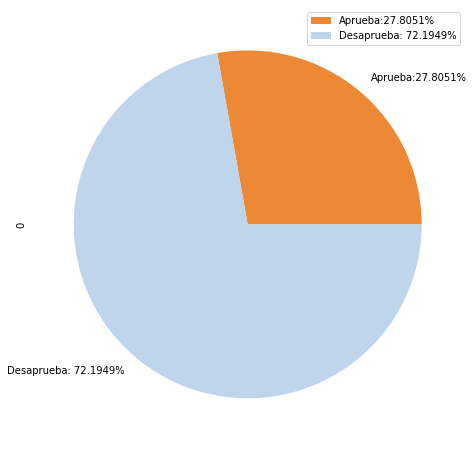

In [33]:


# Prueba modelo
dist = np.random.multinomial(1,probs,1000000)
generated_df = targets.T.dot(dist.T).T
X_prueba = generated_df
Y_prueba = algoritmo.predict(X_prueba)
aprueba = (Y_prueba == 1).sum()
desaprueba = (Y_prueba == 0).sum()

import pandas as pd
df_plt = pd.DataFrame([aprueba,desaprueba], index=['Aprueba:' + str(round(aprueba/(aprueba+desaprueba)*100,5)) + '%' ,'Desaprueba: ' + str(round(desaprueba/(aprueba+desaprueba)*100,5)) + '%'])
df_plt.plot(kind='pie', subplots=True, figsize=(8, 8), colors = ['#ED8934','#BFD5EC'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f457e174ef0>],
      dtype=object)

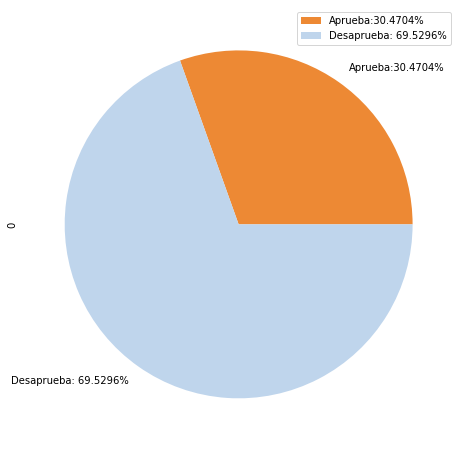

In [34]:


# Prueba modelo
dist = np.random.multinomial(1,optimista,1000000)
generated_df = targets.T.dot(dist.T).T
X_prueba = generated_df
Y_prueba = algoritmo.predict(X_prueba)
aprueba = (Y_prueba == 1).sum()
desaprueba = (Y_prueba == 0).sum()

import pandas as pd
df_plt = pd.DataFrame([aprueba,desaprueba], index=['Aprueba:' + str(round(aprueba/(aprueba+desaprueba)*100,5)) + '%' ,'Desaprueba: ' + str(round(desaprueba/(aprueba+desaprueba)*100,5)) + '%'])
df_plt.plot(kind='pie', subplots=True, figsize=(8, 8), colors = ['#ED8934','#BFD5EC'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f457e0c5470>],
      dtype=object)

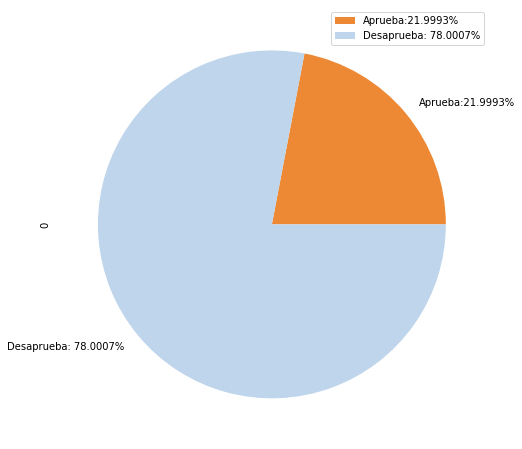

In [35]:


# Prueba modelo
dist = np.random.multinomial(1,pesimista,1000000)
generated_df = targets.T.dot(dist.T).T
X_prueba = generated_df
Y_prueba = algoritmo.predict(X_prueba)
aprueba = (Y_prueba == 1).sum()
desaprueba = (Y_prueba == 0).sum()

import pandas as pd
df_plt = pd.DataFrame([aprueba,desaprueba], index=['Aprueba:' + str(round(aprueba/(aprueba+desaprueba)*100,5)) + '%' ,'Desaprueba: ' + str(round(desaprueba/(aprueba+desaprueba)*100,5)) + '%'])
df_plt.plot(kind='pie', subplots=True, figsize=(8, 8), colors = ['#ED8934','#BFD5EC'])

In [22]:
test = df[(df.nivel_id == 3) & (df.mate_nc_na == 0)].copy()

In [23]:
replace = {
    'nivel_desemp_matematica':{
        'basico': 0, 'por_debajo_del_basico': 0, 'satisfactorio': 1, 'avanzado': 1
    }
}
test.replace(to_replace=replace, value=None, inplace=True)

In [24]:
test.year_id.value_counts()

2016    277298
2013    256340
2017     27763
Name: year_id, dtype: int64

In [25]:
test.groupby(by='year_id')['nivel_desemp_matematica'].mean()

year_id
2013    0.358060
2016    0.322552
2017    0.518100
Name: nivel_desemp_matematica, dtype: float64

In [26]:
(0.358060-0.322552)/3

0.011835999999999994